# Lecture 6: The Soft-Margin Support Vector Machine  
***

<img src="figs/cogs.jpg",width=1100,height=50>

### Problem 1: Soft-Margin SVM Example
***

Suppose you have the following labeled data set (assume here that red corresponds to $y=1$ and blue corresponds to $y = -1$) and suppose the SVM decision boundary is defined by the weights ${\bf w} = [-1/4, ~ 1/4]^T$ and $b = -1/4$. 


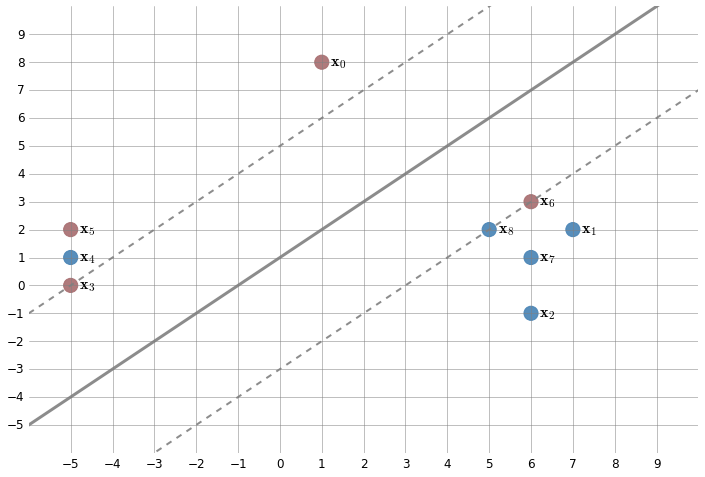

In [25]:
prob1plot()

**Q**: Which training examples are the support vectors? 

**A**: From the data it is a fair assumption that red points above the decision boundary are clorrectly classified and blue points below the decision boundary are correctly classified.  From this we see that ${\bf x}_3$ and ${\bf x}_8$ are support vectors. 

**Q**: Which training examples have nonzero slack? 

**A**: Examples ${\bf x}_4$ and ${\bf x}_6$ are on the wrong side of their support vector boundaries, so they are the only ones with nonzero slack. 

**Q**: Compute the slack $\xi_i$ associated with the misclassified points. 

**A**: We will use the definition $y_i({\bf w}^T{\bf x}_i + b ) = 1 - \xi_i$ to compute the slack 

For ${\bf x}_4$ we have 

$$
y_2 ({\bf w}^T{\bf x}_4 + b) = -1\left(-\frac{1}{4} \cdot -5 + \frac{1}{4} \cdot 1 - \frac{1}{4}\right) = -\frac{5}{4}
\quad \textrm{then} \quad 1 - \xi_4 = -\frac{5}{4} \quad \Rightarrow \quad \xi_4 = \frac{9}{4} = 2.25 
$$

Similarly for ${\bf x}_6$ we have 

$$
y_6 ({\bf w}^T{\bf x}_6 + b) = 1\left(-\frac{1}{4} \cdot 6 + \frac{1}{4} \cdot 3 - \frac{1}{4}\right) = -1
\quad \textrm{then} \quad 1 - \xi_6 = -1 \quad \Rightarrow \quad \xi_6 = 2 
$$

**Q**: What is the interpretation of these slack variables? 

**A**:  You can interpret the slack variables as the number of margins the misclassified point is away from it's correct support vector boundary.  We see that in the case of ${\bf x}_6$ the training example is exactly 2 margins away from the correct support vector boundary.  Similarly ${\bf x}_4$ is a little more than 2 margins away from the correct support vector boundary. 

### Problem 2: Soft-Margin SVM Example
***

Consider the same training set from Problem 1 and suppose the SVM decision boundary this time is defined by the weights ${\bf w} = [0, ~ 2]^T$ and $b = -5$ (arising from a different choice of $C$ in the primal formulation). 


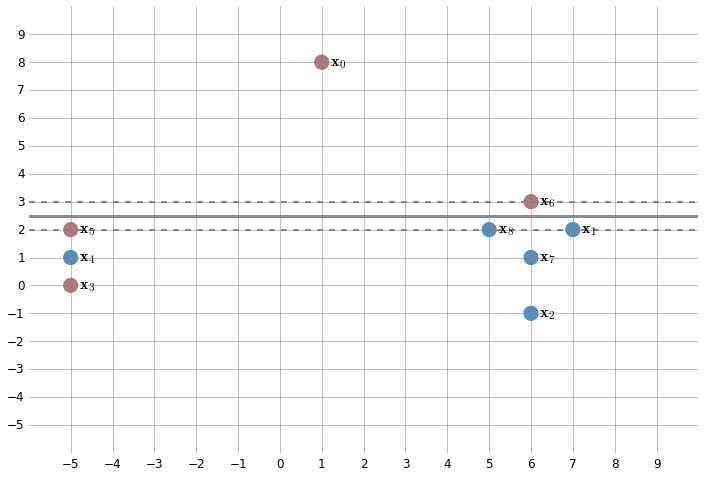

In [27]:
prob2plot()

**Q**: Which training examples are the support vectors? 

**A**: This time the support vectors are ${\bf x}_1$, ${\bf x}_6$ and ${\bf x}_8$.

**Q**: Which training examples have nonzero slack? 

**A**: Examples ${\bf x}_3$ and ${\bf x}_5$ are on the wrong side of their support vector boundaries, so they are the only ones with nonzero slack. 

**Q**: Compute the slack $\xi_i$ associated with the misclassified points. 

**A**: This time we'll just estimate from the picture.  The margin in this example is $M = \frac{1}{2}$, so we have $\xi_3 = 6$ and $\xi_5 = 2$. 


### Problem 3: Soft-Margin SVM Example
***

Consider the following new set of training data and suppose the SVM decision boundary this time is defined by the weights ${\bf w} = [\frac{1}{5}, ~ \frac{4}{5}]^T$ and $b = -\frac{1}{5}$.


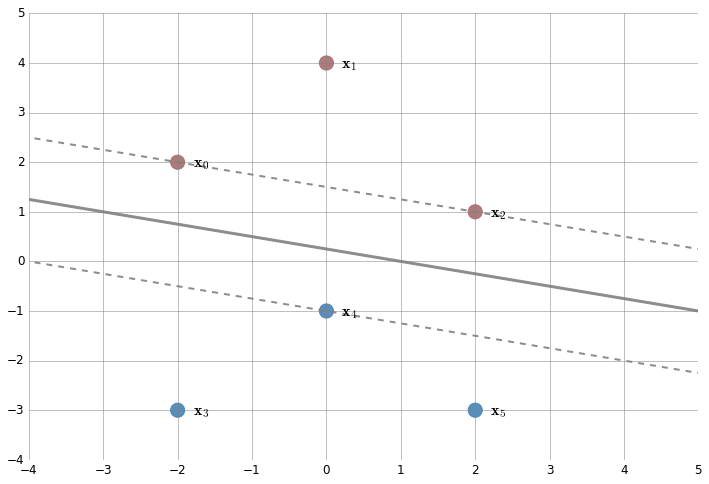

In [50]:
prob3plot()

**Q**: Which training examples are the support vectors? 

**A**: This time the support vectors are ${\bf x}_0$, ${\bf x}_2$ and ${\bf x}_4$.

**Q**: Which training examples have nonzero slack? 

**A**: This time none of them do.  

**Q**:  Suppose that someone told you that the dual $\alpha$ vector for this SVM was 

$$
\alpha = \left[
\begin{array}{c}
0.12 \\
0.00 \\
0.22 \\
0.00 \\
0.34 \\
\end{array}
\right]
$$

How could you check if this was correct? 

**A**:  The first thing to do is to confirm that the sparsity pattern of $\alpha$ makes sense with the support vectors.  Remember that the support vectors are exactly the training examples that have $\alpha_i > 0$.  In this case (using the silly zero-based indexing) the support vectors were ${\bf x}_0$, ${\bf x}_2$, and ${\bf x}_4$. This makes sense because $\alpha[0] = 0.12$, $\alpha[2] = 0.22$, and $\alpha[4] = 0.34$.  

The next thing we could do would be to try to reconstruct the weight vector using the $\alpha$'s.  Recall that the formula for the primal weight vector in terms of the dual variables $\alpha$ is 


$$
{\bf w} = \displaystyle\sum_{i=1}^m = y_i \alpha_i {\bf x}_i 
$$

Forming this linear combination we have 

$$
{\bf w} = 1 \cdot 0.12 \cdot 
\left[
\begin{array}{r}
-2 \\ 2
\end{array}
\right]
+ 
1 \cdot 0.22 \cdot 
\left[
\begin{array}{r}
 2 \\ 1
\end{array}
\right]
- 
1 \cdot 0.34 \cdot 
\left[
\begin{array}{r}
 0 \\ -1
\end{array}
\right]
= 
\left[
\begin{array}{r}
 0.2 \\ 0.8
\end{array}
\right]
= 
\left[
\begin{array}{r}
 \frac{1}{5} \\ \frac{4}{5} 
\end{array}
\right]
$$

as desired. 

### Problem 4: The Margin vs. Slackness Tradeoff 
***

The following function computes the SVM decision function for varying values of $C$ and choice of power on the slack variables.  Play with $C$ and the loss function and see what happens to the decision boundary. 


Margin M =  0.694700291026


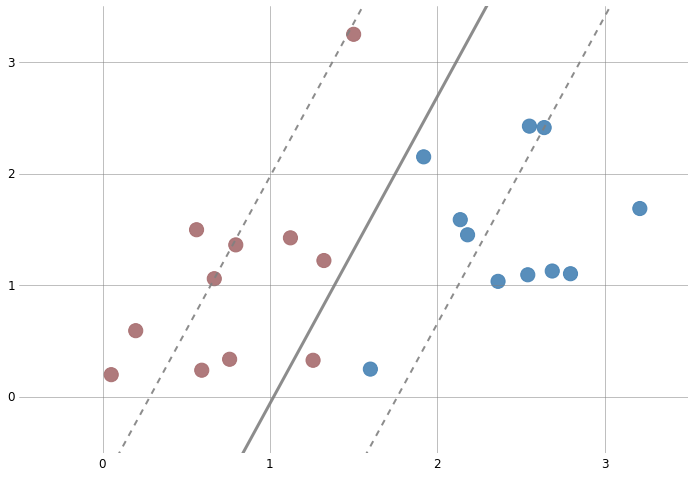

In [30]:
prob4(0.5, "hinge")

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
%matplotlib inline

def prob1plot():
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([
            [ 1,8],
            [ 7,2],
            [ 6,-1],
            [-5,0], 
            [-5,1], 
            [-5,2],
            [ 6,3],
            [ 6,1],
            [ 5,2],
        ])
    y = np.array([
             1,
            -1,
            -1,
             1,
            -1,
             1,
             1,
            -1,
            -1,
        ])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    x = np.linspace(-6,10,2) 
    plt.plot(x, x + 1, color="gray", lw=3, alpha=0.9)
    plt.plot(x, x + 5, color="gray", lw=2, ls="--", alpha=0.9)
    plt.plot(x, x - 3, color="gray", lw=2, ls="--", alpha=0.9)
    ax.text(X[0,0]+.2,X[0,1]-.1,r"${\bf x}_0$", fontsize=16)
    ax.text(X[1,0]+.2,X[1,1]-.1,r"${\bf x}_1$", fontsize=16)
    ax.text(X[2,0]+.2,X[2,1]-.1,r"${\bf x}_2$", fontsize=16)
    ax.text(X[3,0]+.2,X[3,1]-.1,r"${\bf x}_3$", fontsize=16)
    ax.text(X[4,0]+.2,X[4,1]-.1,r"${\bf x}_4$", fontsize=16)
    ax.text(X[5,0]+.2,X[5,1]-.1,r"${\bf x}_5$", fontsize=16)
    ax.text(X[6,0]+.2,X[6,1]-.1,r"${\bf x}_6$", fontsize=16)
    ax.text(X[7,0]+.2,X[7,1]-.1,r"${\bf x}_7$", fontsize=16)
    ax.text(X[8,0]+.2,X[8,1]-.1,r"${\bf x}_8$", fontsize=16)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-6,10])
    plt.ylim([-6,10])
    
def prob2plot():
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([
            [ 1,8],
            [ 7,2],
            [ 6,-1],
            [-5,0], 
            [-5,1], 
            [-5,2],
            [ 6,3],
            [ 6,1],
            [ 5,2],
        ])
    y = np.array([
             1,
            -1,
            -1,
             1,
            -1,
             1,
             1,
            -1,
            -1,
        ])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    x = np.linspace(-6,10,2) 
    plt.plot(x, 0.0*x + 2.5, color="gray", lw=3, alpha=0.9)
    plt.plot(x, 0.0*x + 3, color="gray", lw=2, ls="--", alpha=0.9)
    plt.plot(x, 0.0*x + 2, color="gray", lw=2, ls="--", alpha=0.9)
    ax.text(X[0,0]+.2,X[0,1]-.1,r"${\bf x}_0$", fontsize=16)
    ax.text(X[1,0]+.2,X[1,1]-.1,r"${\bf x}_1$", fontsize=16)
    ax.text(X[2,0]+.2,X[2,1]-.1,r"${\bf x}_2$", fontsize=16)
    ax.text(X[3,0]+.2,X[3,1]-.1,r"${\bf x}_3$", fontsize=16)
    ax.text(X[4,0]+.2,X[4,1]-.1,r"${\bf x}_4$", fontsize=16)
    ax.text(X[5,0]+.2,X[5,1]-.1,r"${\bf x}_5$", fontsize=16)
    ax.text(X[6,0]+.2,X[6,1]-.1,r"${\bf x}_6$", fontsize=16)
    ax.text(X[7,0]+.2,X[7,1]-.1,r"${\bf x}_7$", fontsize=16)
    ax.text(X[8,0]+.2,X[8,1]-.1,r"${\bf x}_8$", fontsize=16)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-6,10])
    plt.ylim([-6,10])
    
def prob3plot():
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([
            [-2,2],
            [ 0,4],
            [ 2,1],
            [-2,-3],
            [ 0,-1],
            [ 2,-3],
        ])
    y = np.array([
             1,
             1,
             1,
            -1,
            -1,
            -1,
        ])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    x = np.linspace(-6,10,2) 
    plt.plot(x, -.25*x + 1./4. , color="gray", lw=3, alpha=0.9)
    plt.plot(x, -.25*x + 1.5, color="gray", lw=2, ls="--", alpha=0.9)
    plt.plot(x, -.25*x - 1, color="gray", lw=2, ls="--", alpha=0.9)
    ax.text(X[0,0]+.2,X[0,1]-.1,r"${\bf x}_0$", fontsize=16)
    ax.text(X[1,0]+.2,X[1,1]-.1,r"${\bf x}_1$", fontsize=16)
    ax.text(X[2,0]+.2,X[2,1]-.1,r"${\bf x}_2$", fontsize=16)
    ax.text(X[3,0]+.2,X[3,1]-.1,r"${\bf x}_3$", fontsize=16)
    ax.text(X[4,0]+.2,X[4,1]-.1,r"${\bf x}_4$", fontsize=16)
    ax.text(X[5,0]+.2,X[5,1]-.1,r"${\bf x}_5$", fontsize=16)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-4,5])
    plt.ylim([-4,5])
    
def prob4(C=1.0, loss="hinge"):
    
    np.random.seed(1239)
    
    X = np.zeros((22,2))
    X[0:10,0]  = 1.5*np.random.rand(10) 
    X[0:10,1]  = 1.5*np.random.rand(10)
    X[10:20,0] = 1.5*np.random.rand(10) +  1.75
    X[10:20,1] = 1.5*np.random.rand(10) +  1
    X[20,0] = 1.5
    X[20,1] = 3.25
    X[21,0] = 1.6
    X[21,1] = 0.25
    
    y = np.ones(22)
    y[10:20] = -1 
    y[20] = 1
    y[21] = -1
    
    clf = LinearSVC(C=C, loss=loss)
    clf.fit(X,y)
    b = clf.intercept_
    w = clf.coef_[0]
    
    # Plot data 
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    
    # Plot SVM boundaries 
    x = np.linspace(-6,10, 10)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1], color="gray", lw=3, alpha=0.9)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1] + 1/w[1], color="gray", lw=2, ls="--", alpha=0.9)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1] - 1/w[1], color="gray", lw=2, ls="--", alpha=0.9)
    
    # Plot Settings 
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([0,1,2,3], fontsize=12)
    plt.yticks([0,1,2,3], fontsize=12)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    
    # Print the margin
    normW = np.linalg.norm(w)
    M = 1.0/normW 
    print "Margin M = ", M 
    
from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")